# Authentication System Using Fingerprint
- Author: Thanh HoangVan
- Email: thanh.hoangvan051199@gmail.com
- Hanoi University of Science and Technology

# Introduction:

Fingerprint biometrics involve: Image Acquisition, Image Enhancing, Feature extraction and matching with template. Since the dataset has unique fingerprints I will implement feature extraction and different techniques for enhancing images such as Edge detection, adaptive thresholding. Feature extraction constitutes of Ridge detection (level 1 feature) and Minutiae extraction (level 3 feature) to generate a template after whicha query image is matched using the metric ROC AUC curve.

```
Sinh trắc học dấu vân tay liên quan đến: Thu nhận hình ảnh, Cải thiện hình ảnh, trích xuất đặc trưng và so khớp với mẫu. Trích xuất đặc trưng bao gồm phát hiện Ridge (đặc trưng mức 1) và trích xuất Minutiae (đặc trưng mức 3) để tạo mẫu so khớp bằng cách sử dụng chỉ số đường cong ROC AUC.
```

# Feature Extraction

## Import Library

In [1]:
import numpy as np
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import matplotlib.image as mpimg
import skimage
import math
from scipy.ndimage.filters import convolve
from PIL import Image,ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

## Displaying fingerprint images

In [2]:
# Input
imageA_path = './data/1.tif'
imageB_path = './data/3.tif'

In [3]:
imageA = imageio.imread(imageA_path)
imageB = imageio.imread(imageB_path)

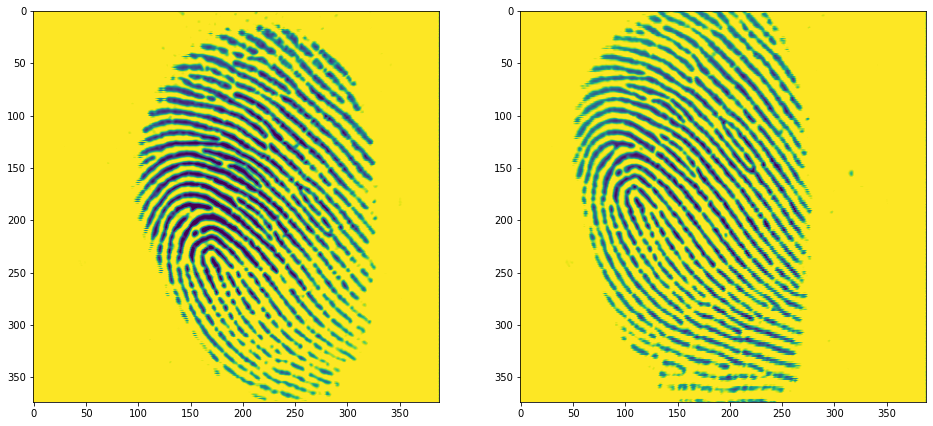

In [4]:
fig, axes = plt.subplots(1,2,figsize = (16,16));
axes[0].imshow(imageA);
axes[1].imshow(imageB);

## Image Transforms - Biến đổi ảnh

1. Image Smoothening - Làm mịn ảnh
2. Thresholding - Lọc ngưỡng
3. Edge Detection - Nhận dạng cạnh

Image enhancement and preprocessing techniques such as smoothing, thresholding and edge detection are used to make features more prominent in data for extraction to be more accurate.
```
Các kỹ thuật tiền xử lý và nâng cao hình ảnh như làm mịn, xác định ngưỡng và nhận diện cạnh được sử dụng để làm cho các đặc trưng nổi bật hơn trong dữ liệu nhằm trích xuất chính xác hơn.
```

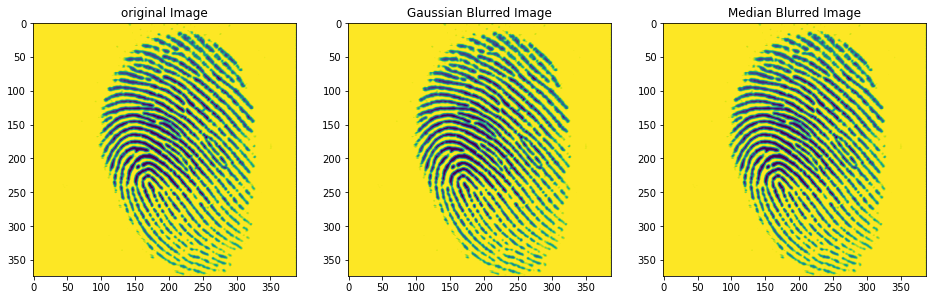

In [5]:
gauss_blur = cv2.GaussianBlur(imageA,(1,1),0)
median_blur = cv2.medianBlur(imageA,1)

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].set_title("original Image");
axes[0].imshow(imageA);
axes[1].set_title("Gaussian Blurred Image");
axes[1].imshow(gauss_blur);
axes[2].set_title("Median Blurred Image");
axes[2].imshow(median_blur);

## Histograms

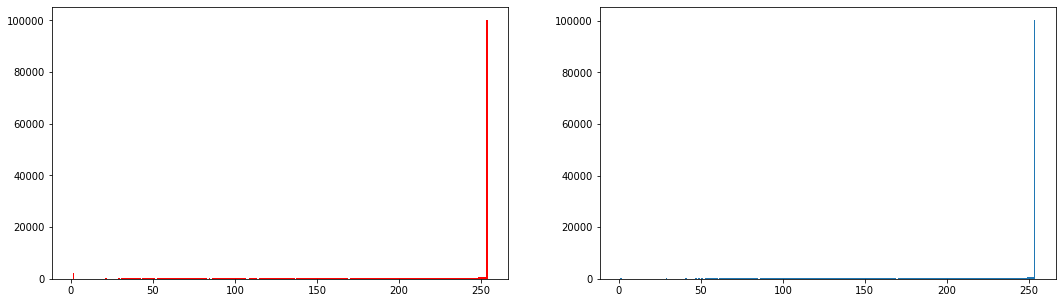

In [6]:
fig, axes = plt.subplots(1,2,figsize = (18,5))
axes[0].hist(imageA.ravel(), bins=256, color ="r");
axes[1].hist(imageB.ravel(), bins=256);


## Implementing mean and Adaptive thresholding

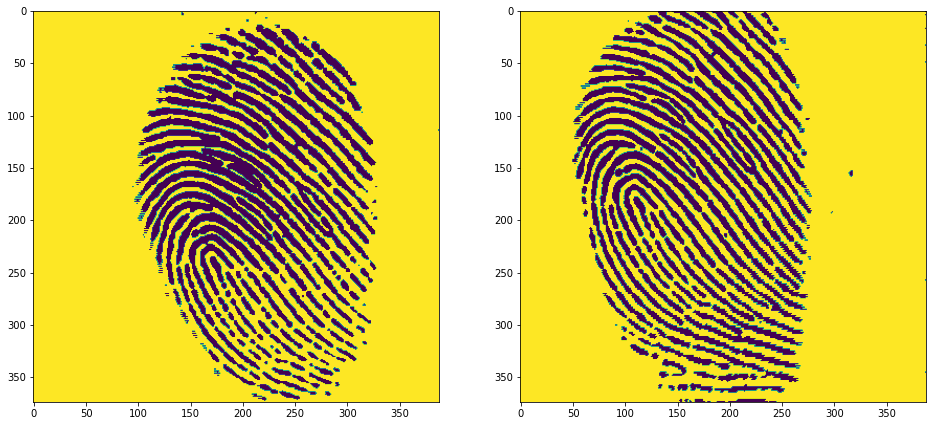

In [7]:
# mean thresholding - gives bad results
THRESHOLD1 = imageA.mean()
THRESHOLD2 = imageB.mean()

image1 = np.array(imageA > THRESHOLD1).astype(int) * 255
image2 = np.array(imageB > THRESHOLD2).astype(int) * 254

fig, axes = plt.subplots(1,2,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);

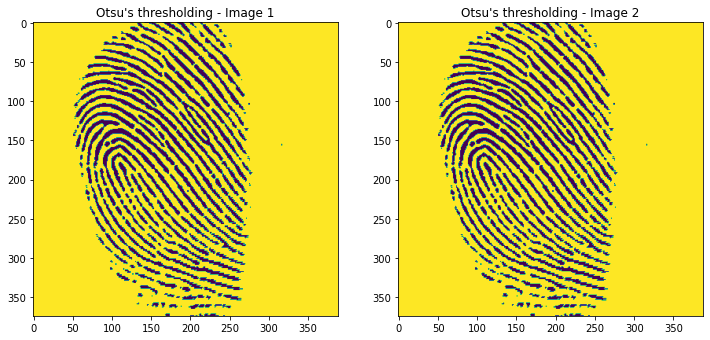

In [8]:
# Adaptive thresholding from OpenCV library - better than Mean Thresholding

img1 = cv2.imread(imageA_path,0)
img2 = cv2.imread(imageB_path,0)

# Otsu's thresholding
ret1,th1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, axes = plt.subplots(1,2,figsize = (12,12));
axes[0].set_title("Otsu's thresholding - Image 1");
axes[0].imshow(th2);
axes[1].set_title("Otsu's thresholding - Image 2");
axes[1].imshow(th2);

## Edge detection

In [9]:
# convert to grayscale
img_name = imageA_path
gray_img_array = np.array(Image.open(img_name).convert('P'))

Robert, Sobel, Prewitt Filters

In [10]:
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [11]:
# implementing:
gray_img = Image.fromarray(gray_img_array)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

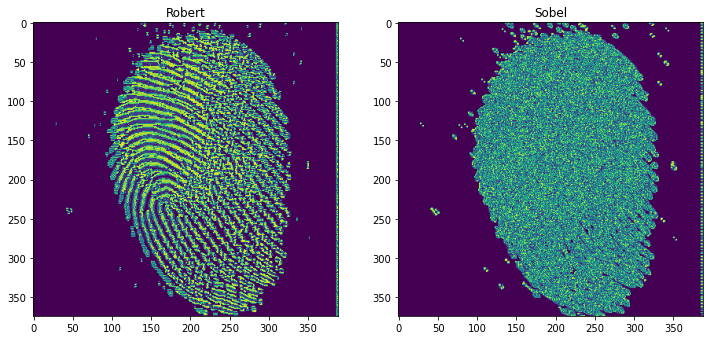

In [12]:
fig, axes = plt.subplots(1,2,figsize = (12,12));
axes[0].set_title("Robert");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel");
axes[1].imshow(convolved_img2);

## Ridge detection

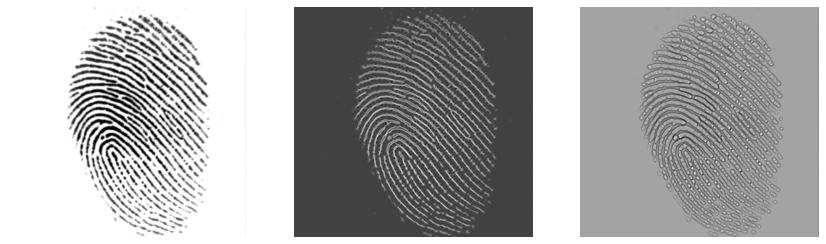

In [13]:
src_path = img_name

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread(src_path, 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{src_path}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)

## Termination and Bifurcation detection and Minutiae Extraction

The given code extracts features like Termination, Bifurcation and Minutiae from finger prints, the output is shown below the code:
```
Đoạn code dưới đây trích xuất các đặc trưng như các Termination, các Bifurcation và Minutiae từ các dấu vân tay
```


In [14]:
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    
    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))         
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [15]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
        return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)


def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)
    
    WindowSize = 2          
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1 
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    return(FeaturesTerm, FeaturesBif)

def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));
        
    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)


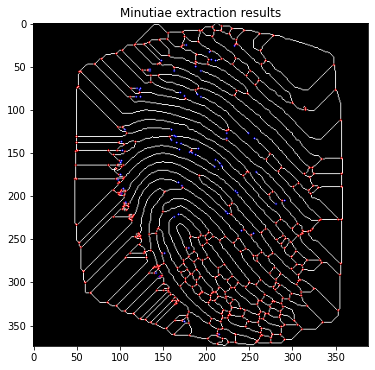

In [16]:
img_name = imageA_path
img = cv2.imread(img_name,0);
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)

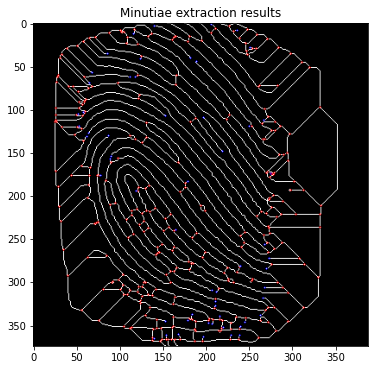

In [17]:
img_name = imageB_path
img = cv2.imread(img_name,0);
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)

In [18]:
for i in range(5):
    print(FeaturesTerm[i].locX)
    print(FeaturesTerm[i].locY)
    print(FeaturesTerm[i].Orientation)
    print(FeaturesTerm[i].Type, end='\n\n')

1
206
0
Termination

3
140
-0.0
Termination

8
236
-180.0
Termination

12
116
63.43494882292201
Termination

28
251
nan
Termination



In [19]:
for i in range(5):
    print(FeaturesBif[i].locX)
    print(FeaturesBif[i].locY)
    print(FeaturesBif[i].Orientation)
    print(FeaturesBif[i].Type, end='\n\n')

3
227
[45.0, -180.0, -90.0]
Bifurcation

7
117
[90.0, -90.0, -45.0]
Bifurcation

6
211
[90.0, -180.0, -0.0]
Bifurcation

7
248
[90.0, -0.0, -135.0]
Bifurcation

8
101
[-180.0, -0.0, -45.0]
Bifurcation



# Matchching Algorithm

In [20]:
print('Number of Terminate points:',len(FeaturesTerm))
print('Number of Bifucation points:', len(FeaturesBif))

Number of Terminate points: 57
Number of Bifucation points: 295


In [21]:
MaxPairDistance = 1.5 #mm
ToleranceForSimilarity = 0.3 #mm
X_TOLERANCE = 0.7 #mm
Y_TOLERANCE = 0.7 #mm
ANGLE_TOLERANCE = 10 #degrees

In [22]:
def MatchSets():
    pass

In [23]:
def GeneratePairs():
    pass

In [24]:
def SimilarPairs():
    pass

In [25]:
def ExtractTransformationParams():
    pass

In [26]:
def DoTranslationOnSourceData():
    pass

In [27]:
def DoRotationOnSourceData():
    pass

In [28]:
def ExistSufficientMatches():
    pass

In [29]:
def Matches():
    pass

In [30]:
# import cv2
# import numpy as np
# import os

# test_original = cv2.imread("1.tif")
# cv2.imshow("Original", test_original)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



# MAS CryptoSystem

In [31]:
class MAS:
    def __init__(self):
        pass
    def __PADDING(self):
        pass
    def __EXTRACT(self):
        pass
    def Encode(self):
        pass
    def Decode(self):
        pass